In [2]:
import pandas as pd
import numpy as np
#from sklearn import GaussianMixture

In [228]:
#Players and their various ids
player_names=pd.read_csv("../Baseball_Data/player_id.csv")
baseball_ref=pd.concat([player_names['bref_id'], player_names['bref_name']], axis=1)

#Basic Offensive Batting Data
basic_batting=pd.read_csv("../Baseball_Data/baseball_ref_data.csv")
basic_batting=basic_batting.iloc[:-1,:]
b_ref=[x.split('\\')[1] for x in basic_batting['Name']]
basic_batting['bref_id']=b_ref
basic_batting=pd.merge(basic_batting, baseball_ref, on='bref_id')


#Statcast Data
stat_cast=pd.read_table("../Baseball_Data/basebal_savant_data.csv")
stat_cast['Brls/PA']=stat_cast['Brls/PA'].map(lambda x: x.rstrip('%'))
stat_cast['Brls/BBE ']=stat_cast['Brls/BBE '].map(lambda x: x.rstrip('%'))
stat_cast['% ']=stat_cast['% '].map(lambda x: x.rstrip('%'))

#Joining the data frames
complete_data=pd.merge(basic_batting, stat_cast, how='inner', left_on='bref_name', right_on='Player ')

#Declaring the index
complete_data=complete_data.set_index(complete_data['bref_id'])
del complete_data.index.name

#Cleaning the main data frame
complete_data=complete_data[complete_data['AB']>50]

to_standardize=['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 
                'SO', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB']
for j in to_standardize:
    complete_data.ix[:,j]=complete_data.ix[:,j]/complete_data.ix[:,'PA']

to_remove=['Rk', 'Name', 'Tm', 'Lg', 'G', 'Pos Summary', 'bref_id', 'bref_name', 'Player ']
for i in to_remove:
    complete_data.drop(i, axis=1, inplace=True)



In [229]:
complete_data.shape

(500, 37)

In [230]:
complete_data.columns

Index(['Age', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF',
       'IBB', 'BBE ', 'Max EV (mph) ', 'Avg EV (mph) ', 'Avg FB/LD EV (mph) ',
       'Avg GB EV (mph) ', 'Max DST (ft) ', 'Avg DST (ft) ',
       'Avg HR-DST (ft) ', '95 MPH+ ', '% ', 'Barrels ', 'Brls/BBE ',
       'Brls/PA'],
      dtype='object')

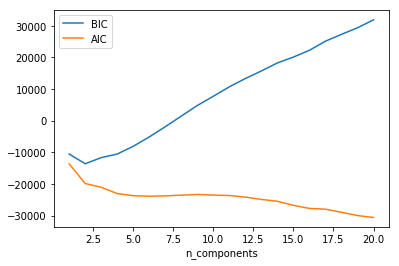

In [249]:

import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
complete_data.fillna(0, inplace=True)
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(complete_data)
          for n in n_components]
plt.plot(n_components, [m.bic(complete_data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(complete_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

In [246]:
#Going with 5
clustering_model=models[4]
predicted_probs=clustering_model.predict_proba(complete_data).round(3)

In [247]:
predicted_probs=pd.DataFrame(predicted_probs)
predicted_probs=predicted_probs.set_index(complete_data.index)
predicted_probs['Player']=predicted_probs.index

In [248]:
predicted_probs

,0,1,2,3,4,Player
abreujo02,1.000,0.0,0.000,0.0,0.000,abreujo02
ackledu01,0.000,0.0,0.000,1.0,0.000,ackledu01
adamecr01,0.000,0.0,0.000,0.0,1.000,adamecr01
adamsma01,0.000,0.0,0.006,0.0,0.994,adamsma01
adriaeh01,0.000,1.0,0.000,0.0,0.000,adriaeh01
ahmedni01,0.000,0.0,0.016,0.0,0.984,ahmedni01
alberha01,0.000,0.0,0.000,1.0,0.000,alberha01
almonab01,0.000,0.0,0.000,0.0,1.000,almonab01
alonsyo01,1.000,0.0,0.000,0.0,0.000,alonsyo01
altheaa01,0.000,0.0,0.000,0.0,1.000,altheaa01
